In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk import accuracy
from tifffile.tifffile import bytestr

In [2]:
data = pd.read_csv('data/heart.csv')

In [3]:
data.columns

Index(['胸痛', '血液循环良好', '动脉阻塞', '是否心脏病'], dtype='object')

In [4]:
def get_gini(data_pair = data,feature = '胸痛',target = '是否心脏病'):
    dp = data_pair.groupby([feature])[target].value_counts().reset_index()
    feature_true = 1 - ((dp[dp[feature] == '是']['count'] / dp[dp[feature] == "是"]['count'].sum()) ** 2).sum()
    feature_false = 1 - (dp[dp[feature] == '否']['count'] / dp[dp[feature] == "否"]['count'].sum() ** 2).sum()
    result = feature_true*(dp[dp[feature] == "是"]['count'].sum()/dp['count'].sum()) + feature_false* (dp[dp[feature] == '否']['count'].sum() / dp['count'].sum())
    return result

In [5]:
get_gini(data,'胸痛')

0.7091584158415842

In [6]:
dp = data.groupby('胸痛')['是否心脏病'].value_counts().reset_index()

In [69]:
dp

,胸痛,是否心脏病,count
0,否,否,125
1,否,是,34
2,是,是,105
3,是,否,39


In [68]:
(dp.groupby('胸痛')['count'].sum()/dp['count'].sum()).to_dict()

{'否': 0.5247524752475248, '是': 0.4752475247524752}

In [4]:
data = pd.read_excel('data/wind(1).xlsx')

In [3]:
data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target_name'],
      dtype='object')

In [5]:
from sklearn.model_selection import train_test_split


In [6]:
X_train,X_test,y_train,y_test = train_test_split(data.iloc[:,:-1],data.iloc[:,-1],test_size=0.2,random_state = 1210)

In [7]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=1210)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [10]:
score = clf.score(X_test,y_test)

In [11]:
score

0.9722222222222222

In [12]:
y_predict = clf.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.95      0.97        19
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



In [14]:
from sklearn.metrics import confusion_matrix

# 假设 y_test 是真实标签，y_predict 是模型预测标签
cm = confusion_matrix(y_test, y_predict)


In [15]:
import seaborn as sns

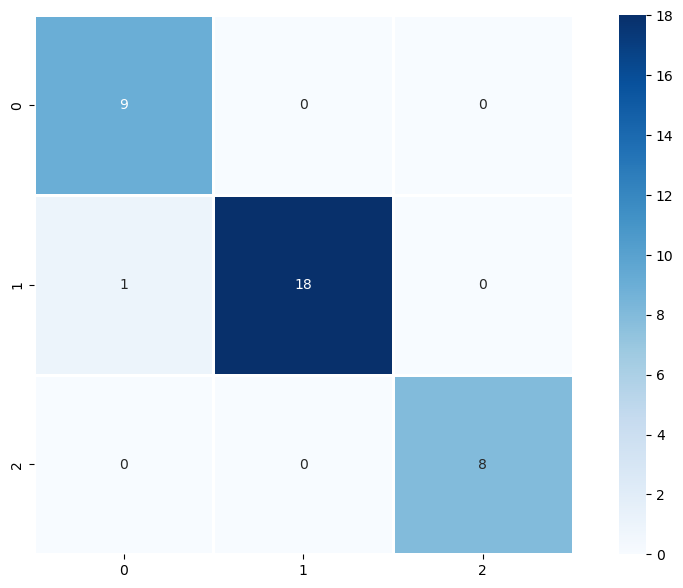

In [15]:
plt.figure(figsize=(12,7))
sns.heatmap(cm,annot = True,cmap = 'Blues',fmt = 'd',edgecolor = 'white',lw = 1,square = True)
plt.show()

In [16]:
feature_name =['酒精', '苹果酸', '灰分', '灰的碱度', '镁',
 '总酚', '黄酮类', '非黄酮类酚',
 '原花青素', '颜色强度', '色调',
 '葡萄酒稀释后的OD280/OD315比值', '脯氨酸']

In [17]:
from sklearn import tree

In [18]:
r = tree.export_text(clf,feature_names=list(data.iloc[:,:-1].columns))
r

'|--- color_intensity <= 3.49\n|   |--- class: 1\n|--- color_intensity >  3.49\n|   |--- flavanoids <= 1.40\n|   |   |--- class: 2\n|   |--- flavanoids >  1.40\n|   |   |--- proline <= 670.00\n|   |   |   |--- class: 1\n|   |   |--- proline >  670.00\n|   |   |   |--- class: 0\n'

In [19]:
import graphviz

In [20]:
dot = tree.export_graphviz(clf, feature_names=feature_name, class_names=['啤酒', '白酒', '红酒'],filled=True, rounded=True, special_characters=True,fontname='STsong')
graph = graphviz.Source(dot)
graph.render('dtree',format = 'pdf')#pycharm渲染效果不好,可以先render到本地在本地文件管理中查看

'dtree.pdf'

In [21]:
import dtreeviz

In [23]:
viz_model = dtreeviz.model(clf
                           ,X_train = X_train,
                           y_train = y_train,
                           feature_names = feature_name,
                           target_name=['啤酒','白酒','红酒'])

In [28]:
colors = {
    'title':'red',
    'legend_edge':'cyan',
    'text':'red',
    'wedge':'pink'
}

In [31]:
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.050,2.85,1450
82,12.08,1.13,2.51,24.0,78,2.00,1.58,0.40,1.40,2.20,1.310,2.72,630
113,11.41,0.74,2.50,21.0,88,2.48,2.01,0.42,1.44,3.08,1.100,2.31,434
10,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.250,3.17,1510
129,12.04,4.30,2.38,22.0,80,2.10,1.75,0.42,1.35,2.60,0.790,2.57,580
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.980,1.59,450
70,12.29,1.61,2.21,20.4,103,1.10,1.02,0.37,1.46,3.05,0.906,1.82,870
84,11.84,0.89,2.58,18.0,94,2.20,2.21,0.22,2.35,3.05,0.790,3.08,520
32,13.68,1.83,2.36,17.2,104,2.42,2.69,0.42,1.97,3.84,1.230,2.87,990


In [29]:
viz = viz_model.view(
    fontname = 'STsong',
    scale = 1.5,
    orientation = 'RL',
    label_fontsize=16,
    ticks_fontsize=14,
    title='Dtree 标题测试',
    title_fontsize  = 20,
    show_root_edge_labels = True,
    show_node_labels = True,
    leaftype = 'pie',
    histtype = 'bar',
    fancy = True,
    colors=colors
)

D:\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


In [32]:
viz.save('result/dtreeviz.svg')


(dot.exe:28084): Pango-WARNING **: couldn't load font "STsong Italic Not-Rotated 14", falling back to "Sans Italic Not-Rotated 14", expect ugly output.


In [33]:
import cairosvg

In [34]:
with open('./a.svg') as f:
    svg = f.read()
cairosvg.svg2png(bytestring=svg,write_to='result/dtreeviz.png',scale = 2,dpi = 300)
cairosvg.svg2pdf(bytestring=svg,write_to='result/dtreeviz.pdf')

D:\Anaconda3\Lib\site-packages\dtreeviz\models\shadow_decision_tree.py:335: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
D:\Anaconda3\Lib\site-packages\dtreeviz\trees.py:1231: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


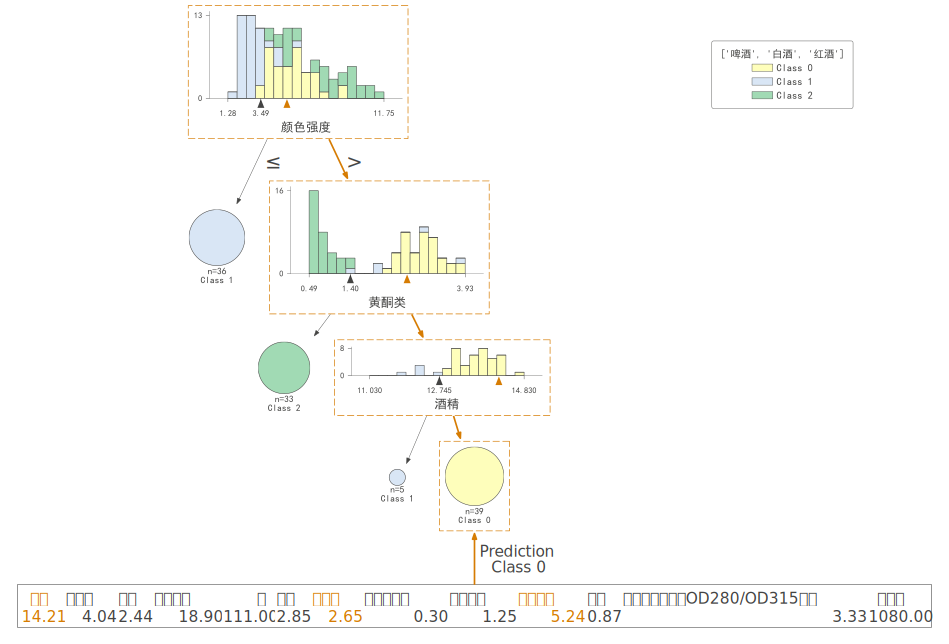

In [29]:
#显示制定样本的预测路径
viz_model.view(x = X_train.iloc[20],fontname = 'Simhei',scale = 1.4)
               

In [24]:
viz_model.node_stats(node_id=6)#获得指定节点的统计信息

D:\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


,酒精,苹果酸,灰分,灰的碱度,镁,总酚,黄酮类,非黄酮类酚,原花青素,颜色强度,色调,葡萄酒稀释后的OD280/OD315比值,脯氨酸
count,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0
mean,13.686923,2.021795,2.431026,17.405128,106.153846,2.806154,2.964872,0.290513,1.928718,5.489744,1.077436,3.148718,1100.307692
std,0.461754,0.719736,0.243124,2.760144,10.235486,0.317462,0.407017,0.072908,0.430564,1.361187,0.108233,0.36138,227.311536
min,12.85,1.35,2.04,11.2,90.0,2.35,2.19,0.17,1.25,3.58,0.82,2.51,680.0
25%,13.27,1.65,2.275,16.0,99.0,2.62,2.68,0.255,1.66,4.34,1.025,2.87,987.5
50%,13.73,1.73,2.41,17.4,103.0,2.8,2.98,0.28,1.92,5.4,1.08,3.1,1060.0
75%,14.04,1.96,2.58,18.95,111.5,2.955,3.245,0.32,2.12,6.315,1.13,3.385,1212.5
max,14.83,4.04,3.22,25.0,132.0,3.88,3.93,0.5,2.96,8.9,1.25,4.0,1680.0


In [25]:
import matplotlib.pyplot as plt

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid  = {
    'max_depth':list(range(3,8)),
    'criterion':['gini','entropy','log_loss'],
    'ccp_alpha':[0,0.01,0.05,0.1,0.5],
    'min_samples_leaf':list(range(1,20)),
    'min_samples_split':list(range(5,20)),
    'max_leaf_nodes':list(range(2,7)),
    'splitter':['best','random'],
}

In [28]:
tree  = DecisionTreeClassifier()
gd = GridSearchCV(estimator=tree, param_grid = param_grid,
                  n_jobs = -1,verbose=2,scoring = 'f1_micro',
                  cv = 2
                  )
gd.fit(X_train,y_train)

Fitting 2 folds for each of 213750 candidates, totalling 427500 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0, 0.01, 0.05, 0.1, 0.5],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_leaf_nodes': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [5, 6, 7, 8, 9, 10, 11, 12, 13,
                                               14, 15, 16, 17, 18, 19],
                         'splitter': ['best', 'random']},
             scoring='f1_micro', verbose=2)

In [31]:
print(gd.best_estimator_)#最好的参数组合
print(gd.best_score_)#最好的分数

DecisionTreeClassifier(ccp_alpha=0, max_depth=3, max_leaf_nodes=4,
                       min_samples_split=5)
0.9910714285714286


In [32]:
dt = DecisionTreeClassifier(
    ccp_alpha=0, max_depth=3, max_leaf_nodes=4,
                       min_samples_split=5
)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0, max_depth=3, max_leaf_nodes=4,
                       min_samples_split=5)

In [34]:
#测试集评分
y_pred = dt.predict(X_test)
accuracy_score(y_true=y_test,y_pred = y_pred)

0.9722222222222222

In [35]:
y_pred_val = dt.predict(X_val)
accuracy_score(y_true=y_val, y_pred=y_pred_val)

0.896551724137931

In [36]:
from sklearn.datasets import load_iris

In [37]:
iris = load_iris()

In [42]:
features = ['花萼的长度','花萼的宽度', '花瓣的长度', '花瓣的宽度']
X = iris.data
y = iris.target

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1210)

In [40]:
dtc_iris = DecisionTreeClassifier(max_depth=2,
                                 min_samples_leaf=1,
                                 random_state=666)
dtc_iris.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=666)

In [41]:
dtc_iris.score(X_test,y_test)

0.9666666666666667

In [43]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

In [44]:
#模型的具现
viz_model = dtreeviz.model(
    dtc_iris,
    X_train = X_train,
    y_train = y_train,
    feature_names = features,
    target_name = list(iris.target_names),
    class_names=list(iris.target_names)
)

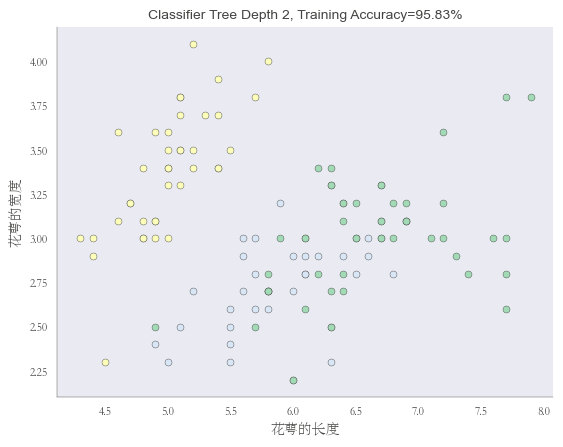

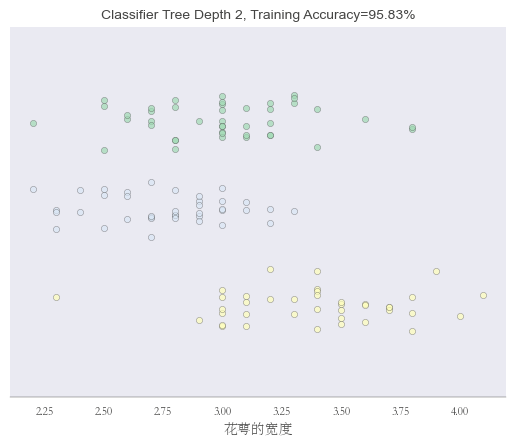

In [45]:
#数据集分布
viz_model.ctree_feature_space(show={'splits','title'},fontname='STsong',)
viz_model.ctree_feature_space(show={'splits', 'title'},features=['花萼的宽度'],fontname='STsong',)
plt.show()

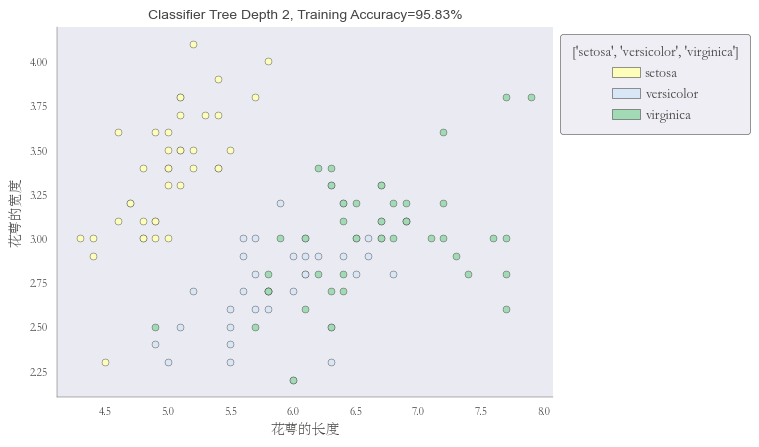

In [46]:
viz_model.ctree_feature_space(nbins = 40, gtype='barstacked', fontname='STsong')
plt.show()

### 支持的颜色定义
以下是 `COLORS` 字典中各个参数的详细说明：

1. `scatter_edge`：散点图边缘的颜色，这里设置为 `GREY`（灰色）。

2. `scatter_marker`：散点图中标记点的颜色，这里设置为 `BLUE`（蓝色）。

3. `scatter_marker_alpha`：散点图中标记点的透明度，这里设置为 0.7。

4. `class_boundary`：类别边界线的颜色，这里设置为 `GREY`（灰色）。

5. `warning`：警告信息的颜色，这里设置为 `#E9130D`（一种红色）。

6. `tile_alpha`：在决策边界中用于显示概率的正方形平铺的透明度，这里设置为 0.8。

7. `tessellation_alpha`：用于决策树特征空间划分的矩形区域的透明度，这里设置为 0.3。

8. `tessellation_alpha_3D`：3D视图中用于特征空间划分的矩形区域的透明度，这里设置为 0.5。

9. `split_line`：分割线的颜色，这里设置为 `GREY`（灰色）。

10. `mean_line`：均值线的颜色，这里设置为 `#f46d43`（一种橙色）。

11. `axis_label`：坐标轴标签的颜色，这里设置为 `GREY`（灰色）。

12. `title`：标题的颜色，这里设置为 `GREY`（灰色）。

13. `legend_title`：图例标题的颜色，这里设置为 `GREY`（灰色）。

14. `legend_edge`：图例边缘的颜色，这里设置为 `GREY`（灰色）。

15. `edge`：边缘的颜色，这里设置为 `GREY`（灰色）。

16. `color_map_min`：颜色映射的最小值对应的颜色，这里设置为 `#c7e9b4`（一种浅绿色）。

17. `color_map_max`：颜色映射的最大值对应的颜色，这里设置为 `#081d58`（一种深蓝色）。

18. `classes`：用于分类的颜色列表，这里设置为 `color_blind_friendly_colors`（一组对色盲友好的颜色）。

19. `rect_edge`：矩形边缘的颜色，这里设置为 `GREY`（灰色）。

20. `text`：文本的颜色，这里设置为 `GREY`（灰色）。

21. `highlight`：高亮显示的颜色，这里设置为 `HIGHLIGHT_COLOR`（一个预定义的高亮颜色）。

22. `wedge`：扇形图的颜色，这里设置为 `WEDGE_COLOR`（一个预定义的扇形图颜色）。

23. `text_wedge`：扇形图中文本的颜色，这里设置为 `WEDGE_COLOR`（与扇形图颜色相同）。

24. `arrow`：箭头的颜色，这里设置为 `GREY`（灰色）。

25. `node_label`：节点标签的颜色，这里设置为 `GREY`（灰色）。

26. `tick_label`：刻度标签的颜色，这里设置为 `GREY`（灰色）。

27. `leaf_label`：叶节点标签的颜色，这里设置为 `GREY`（灰色）。

28. `pie`：饼图的颜色，这里设置为 `GREY`（灰色）。

29. `hist_bar`：直方图条形的颜色，这里设置为 `LIGHTBLUE`（浅蓝色）。

30. `categorical_split_left`：分类分割左侧的颜色，这里设置为 `CATEGORICAL_SPLIT_LEFT`（一个预定义的颜色）。

31. `categorical_split_right`：分类分割右侧的颜色，这里设置为 `CATEGORICAL_SPLIT_RIGHT`（一个预定义的颜色）。

In [47]:
import dtreeviz
from sklearn.datasets import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import matplotlib.pyplot as plt

from IPython.display import SVG, display

%config InlineBackend.figure_format = 'retina' # Make visualizations look good
#%config InlineBackend.figure_format = 'svg' 
%matplotlib inline
def show_iris(colors=None):
    iris = load_iris()
    X = iris.data
    X = X[:,2].reshape(-1,1) # petal length (cm)
    y = iris.target
    len(X), len(y)

    feature_c_univar = "petal length (cm)"
    target_c_univar = "iris"
    class_names_univar = list(iris.target_names)
    
    dtc_univar = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1)
    dtc_univar.fit(X, y)
    
    fig, ax = plt.subplots(1, 1, figsize=(4,1))
    m = dtreeviz.model(dtc_univar, X, y,
                       feature_names=[feature_c_univar],
                       target_name=target_c_univar,
                       class_names=class_names_univar)
    m.ctree_feature_space(
                fontsize=10,
                nbins=40, gtype='strip',
                show={'splits','title'},
                colors=colors, ax=ax)

In [48]:
show_iris()

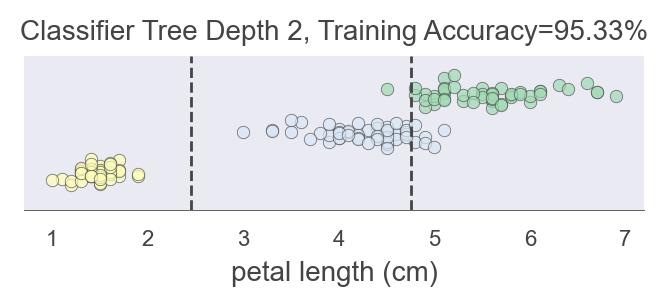

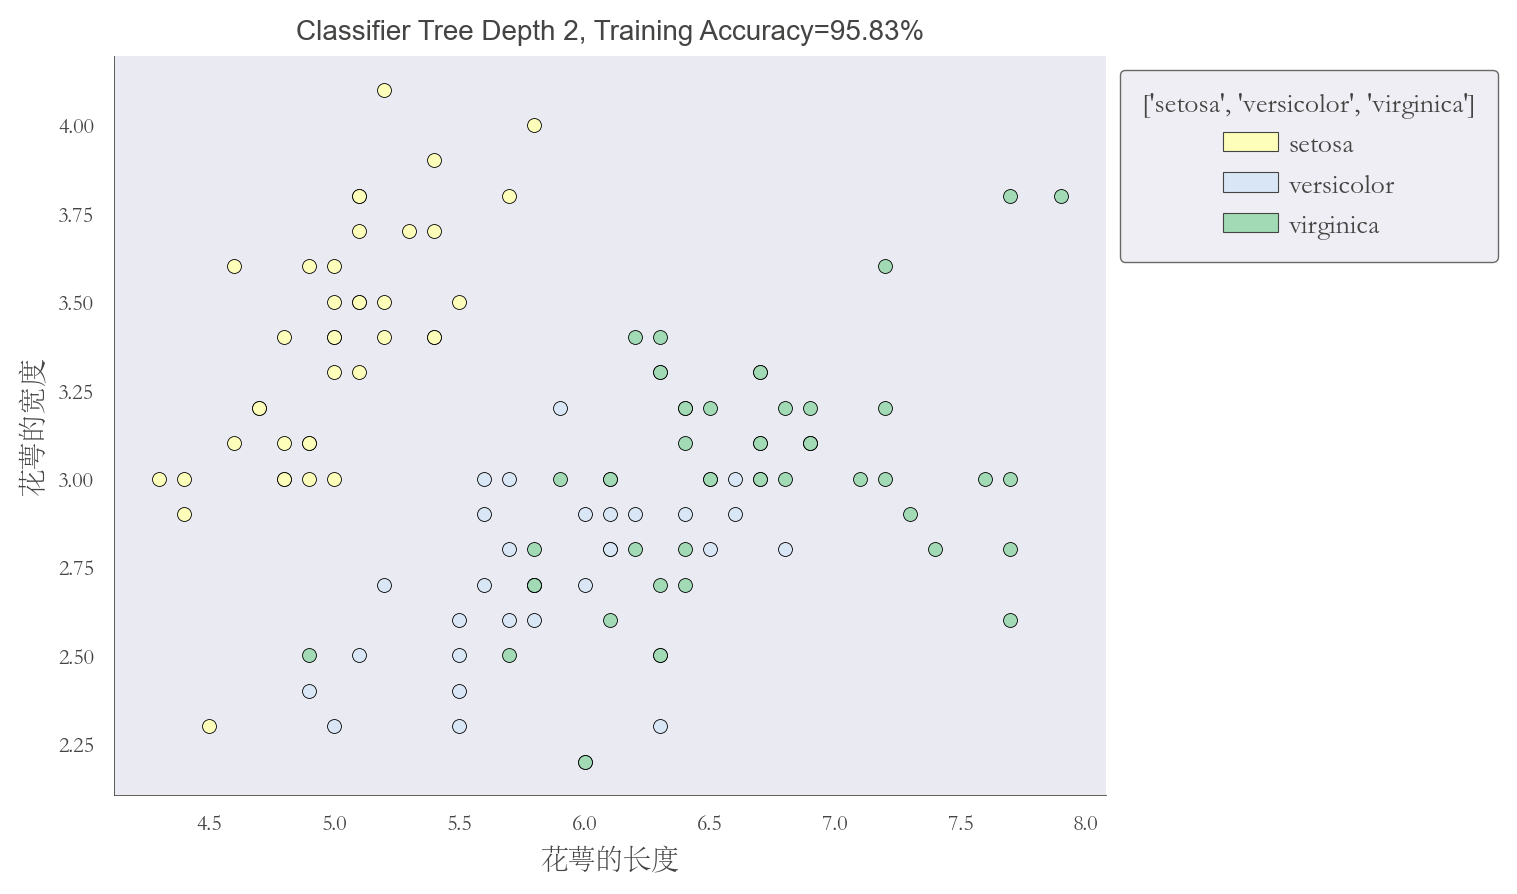

In [49]:
colors=  {
         'scatter_edge':'black',
          'scatter_marker_alpha':1,
         }

viz_model.ctree_feature_space(nbins = 40, 
                              colors=colors, 
                              gtype='barstacked', fontname='STsong')
plt.show()